In [1]:
import nltk
import numpy as np
import pandas as pd
import prepare_data
import matplotlib.pyplot as plt

In [3]:
from syntax_features import counts
from feature_extraction_V1 import get_text_features_V1

In [4]:
# counts:
re_feature_names = ["Subordination", "Complements", "Coordination", "Apposition", "Passive verbs", "Parataxis", "Auxiliary Verbs", "Negation", "Prepositional Phrases", "Modifiers"]
# get_text_features_V1
pa_feature_names = ["Mean word length", "Mean sentence length", "Basic english ratio", "Syllables per sentence", "Type token ratio", "#nouns", "#verbs", "#adjectives", "#adverbs", "#pronouns", "#commas"]


In [5]:
class TextScorer:    
    lsat_texts = None
    re_features_max = None
    pa_features_max = None
    
    def __init__(self):
        with open('data/LSATtexts.txt', 'r', encoding="utf8") as lsat_file:
            self.lsat_texts = lsat_file.read()
            self.lsat_texts = self.lsat_texts.split("\n\n")
            for text in self.lsat_texts:
                if text[0] == '#':
                    self.lsat_texts.remove(text)
        
        self.re_features_max = np.array(np.mean(counts(self.lsat_texts), axis=0))
        self.pa_features_max = np.array(get_text_features_V1("\n".join(self.lsat_texts)))
        
    
    def score(self, text):
        re_features = np.array(counts([text])).reshape(-1)
        pa_features = np.array(get_text_features_V1(text))
        return re_features / self.re_features_max, pa_features / self.pa_features_max

In [6]:
ts = TextScorer()
print(ts.re_features_max)
print(ts.pa_features_max)

[1.06738085 0.65390506 1.06560256 0.1188786  0.30944092 0.01681877
 1.51009563 0.1952785  3.3957367  3.78363259]
[4.45003281e+00 3.05147232e+01 1.17553070e-01 4.55429918e+01
 1.62118346e-03 7.17314488e+00 4.24146054e+00 2.62779741e+00
 1.38515901e+00 1.46996466e+00 1.81861013e+00]


In [7]:
ts.score("My house, which I like, is green. Blue monkeys enjoy cheese! The cheese was quickly eaten.")

(array([0.31229091, 0.        , 0.        , 0.        , 1.07721156,
        0.        , 0.22073657, 0.        , 0.        , 0.17619752]),
 array([8.02562301e-01, 2.29397460e-01, 2.50199886e+00, 1.82977293e-01,
        4.40595238e+02, 1.85878489e-01, 3.92946404e-01, 2.53697893e-01,
        2.40646259e-01, 4.53525641e-01, 3.66580311e-01]))

------------------

In [9]:
df = prepare_data.load_df("data/british_council/cleaned_articles.csv",["cleaned1","cleaned2","cleaned3"])
df[["cleaned1","cleaned2","cleaned3"]] = df[["cleaned1","cleaned2","cleaned3"]].applymap(lambda x: " ".join(x))
df.head()

,article_name,cleaned1,cleaned2,cleaned3
0,walk-forest-level,Going through the forest is my favourite part ...,Going through the forest is my favourite part ...,Going through the forest is my favourite part ...
1,amazing-adventurers-level,Do you ever dream about climbing Mount Everest...,Have you ever dreamt of climbing Mount Everest...,Have you ever dreamt of climbing Mount Everest...
2,animals-city-level,"One night in December 2011, a bear came into t...","Recently, there have been many reports in news...","Small animals like birds, squirrels, mice and ..."
3,bully-level,Kay got another message as she was leaving for...,Kay got another message as she was leaving for...,Kay got another message as she was leaving for...
4,cheat-level,Mo was waiting outside her class. She was feel...,Mo was waiting in the corridor outside her cla...,Mo was waiting in the corridor with her class ...


In [10]:
level1 = []
level2 = []
level3 = []

for article_index in range(df.shape[0]):
    level1.append(np.concatenate(ts.score(df.iloc[article_index, 1])))
    level2.append(np.concatenate(ts.score(df.iloc[article_index, 2])))
    level3.append(np.concatenate(ts.score(df.iloc[article_index, 3])))
    
level1_scores = pd.DataFrame(np.array(level1).reshape(df.shape[0],-1), columns=re_feature_names+pa_feature_names)
level2_scores = pd.DataFrame(np.array(level2).reshape(df.shape[0],-1), columns=re_feature_names+pa_feature_names)
level3_scores = pd.DataFrame(np.array(level3).reshape(df.shape[0],-1), columns=re_feature_names+pa_feature_names)

In [11]:
level1_scores.head()

,Subordination,Complements,Coordination,Apposition,Passive verbs,Parataxis,Auxiliary Verbs,Negation,Prepositional Phrases,Modifiers,...,Mean sentence length,Basic english ratio,Syllables per sentence,Type token ratio,#nouns,#verbs,#adjectives,#adverbs,#pronouns,#commas
0,0.061942,0.379159,0.279204,0.13904,0.053415,0.0,0.322896,0.719464,0.150894,0.102661,...,0.287293,2.960240,0.213352,19.349335,0.232348,0.385087,0.139534,0.246662,0.833353,0.178708
1,0.405978,0.560734,0.844593,0.00000,0.107721,0.0,0.485620,0.170696,0.461363,0.431684,...,0.536353,2.988874,0.464030,36.432111,0.627340,0.644432,0.418602,0.457228,0.702965,0.201619
2,0.312291,0.254879,0.729895,0.00000,0.000000,0.0,0.239131,0.142247,0.482631,0.227588,...,0.435127,3.564300,0.369614,29.680265,0.553763,0.432241,0.211415,0.280754,0.510216,0.244387
3,0.142204,0.395973,0.175957,0.22532,0.115416,0.0,0.236503,0.685834,0.134097,0.125069,...,0.273404,2.741079,0.215809,21.124429,0.280145,0.383965,0.134097,0.233771,0.596062,0.078553
4,0.111737,0.462991,0.301333,0.00000,0.000000,0.0,0.364519,1.033574,0.145893,0.147909,...,0.425569,2.972254,0.338508,19.131729,0.455015,0.651636,0.295981,0.391050,1.114917,0.221476


Subordination


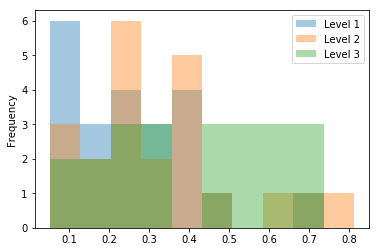

Complements


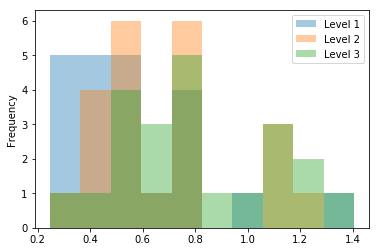

Coordination


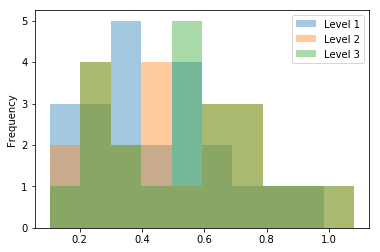

Apposition


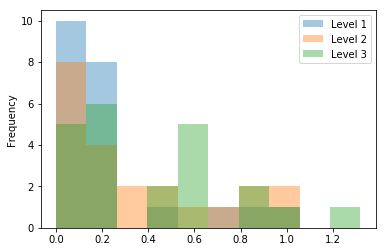

Passive verbs


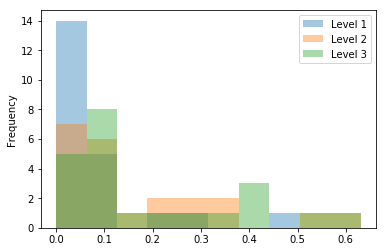

Parataxis


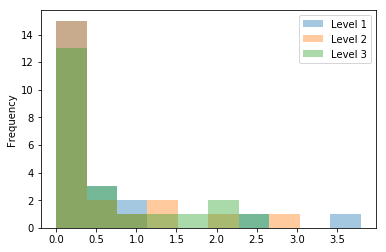

Auxiliary Verbs


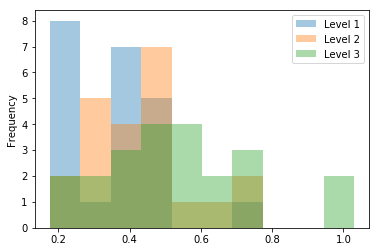

Negation


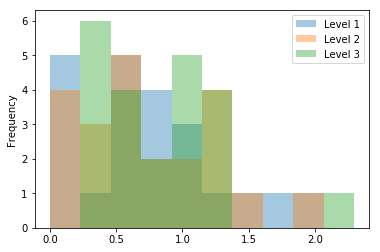

Prepositional Phrases


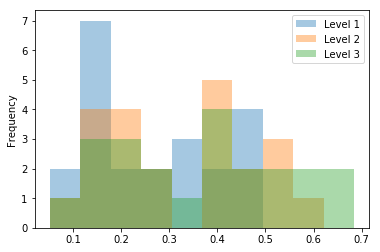

Modifiers


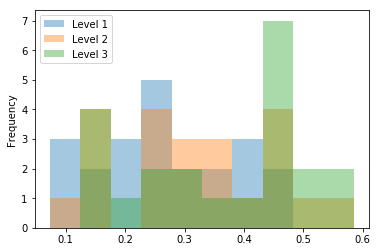

Mean word length


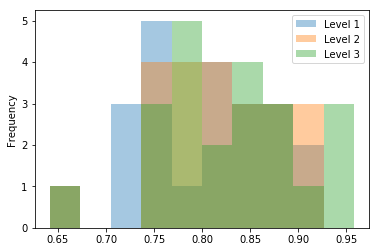

Mean sentence length


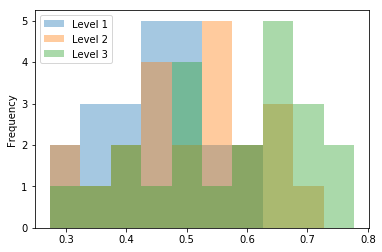

Basic english ratio


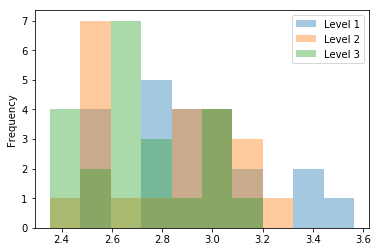

Syllables per sentence


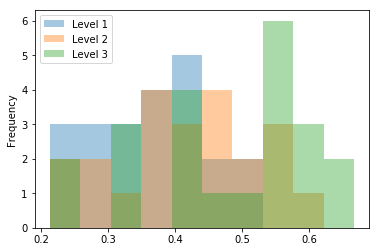

Type token ratio


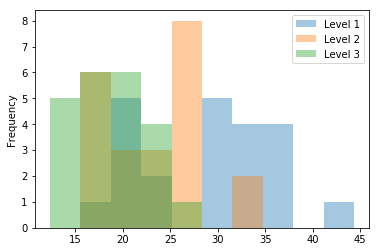

#nouns


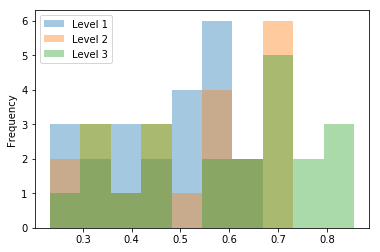

#verbs


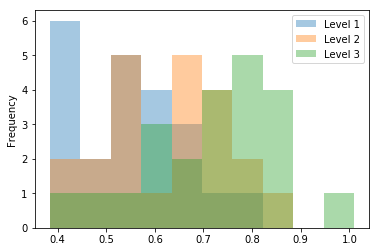

#adjectives


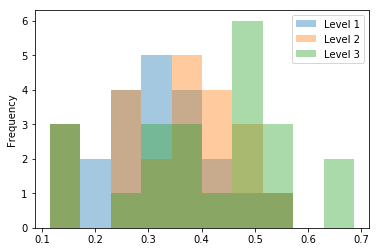

#adverbs


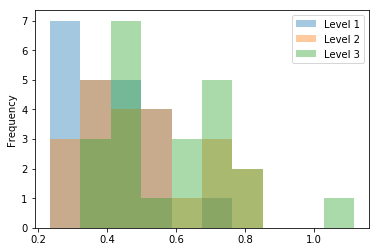

#pronouns


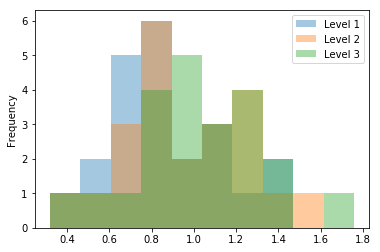

#commas


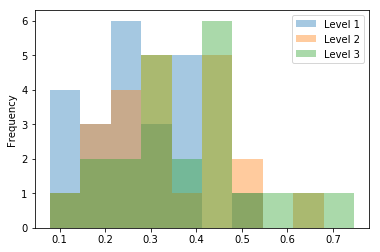

In [12]:
for col in level1_scores.columns:
    print(col)
    subord = pd.concat([level1_scores[col], level2_scores[col], level3_scores[col]], axis=1)
    subord.columns = ["Level 1", "Level 2", "Level 3"]
    subord.plot.hist(alpha=0.4)
    plt.show()

In [13]:
lvl1 = level1_scores.copy()
lvl1 = lvl1.drop(["Type token ratio"], axis=1)
lvl1["Basic english ratio"] = lvl1["Basic english ratio"].apply(lambda x: 1/x)
lvl1 = lvl1.apply(np.sum, axis=1)

lvl2 = level2_scores.copy()
lvl2 = lvl2.drop(["Type token ratio"], axis=1)
lvl2["Basic english ratio"] = lvl2["Basic english ratio"].apply(lambda x: 1/x)
lvl2 = lvl2.apply(np.sum, axis=1)

lvl3 = level3_scores.copy()
lvl3 = lvl3.drop(["Type token ratio"], axis=1)
lvl3["Basic english ratio"] = lvl3["Basic english ratio"].apply(lambda x: 1/x)
lvl3 = lvl3.apply(np.sum, axis=1)

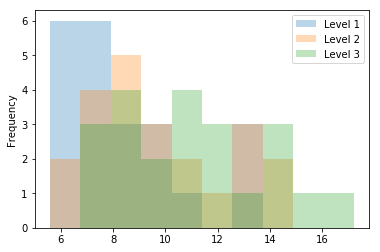

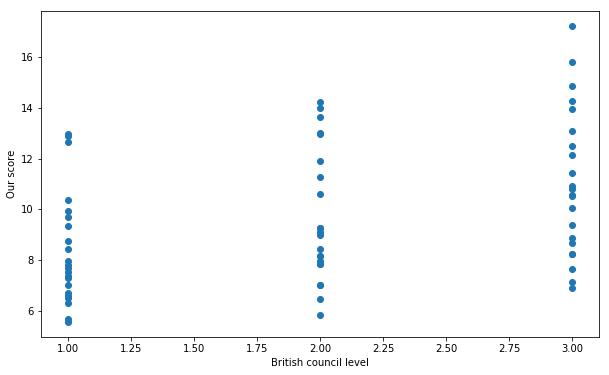

In [14]:
text_scores = pd.concat([lvl1, lvl2, lvl3], axis=1)
text_scores.columns = ["Level 1", "Level 2", "Level 3"]

y = list(text_scores["Level 1"]) + list(text_scores["Level 2"]) + list(text_scores["Level 3"])
x = [1]*22 + [2]*22 + [3]*22

text_scores.plot.hist(alpha=0.3)
plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("British council level")
plt.ylabel("Our score")
plt.scatter(x, y)
plt.show()

-----------

In [17]:
str.encode(encoding=utf_ ,errors='replace')

TypeError: descriptor 'encode' of 'str' object needs an argument

In [18]:
newsela_dir = "./data/newsela/"
newsela_art = ["42157-", "44271-", "44294-", "44300-", "44384-", "44418-", "44581-"]
newsela_levels = {"42157-": ["560", "830", "920", "1020", "max"],
                  "44271-": ["580", "820", "1060", "1210", "max"],
                  "44294-": ["380", "530", "690", "790", "max"],
                  "44300-": ["540", "800", "1020", "1130", "max"],
                  "44384-": ["560", "850", "950", "1070", "max"],
                  "44418-": ["570", "830", "1050", "1220", "max"],
                  "44581-": ["600", "870", "1030", "1170", "max"]}

x = []
y = []

for a in newsela_art:
    for l in newsela_levels[a]:
        with open(newsela_dir+a+l+".txt", "r",encoding='utf-8') as f:
            score = np.concatenate(ts.score(f.read()))
            score[12] = 1 / score[12] #basic english
            score[14] = 0 #ttr
            print(a, l, np.sum(score))
            
            if not l == "max":
                x.append(float(l))
                y.append(np.sum(score))

42157- 560 6.450091330516566
42157- 830 8.701376038445005
42157- 920 10.187456035380558


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 1953: invalid start byte

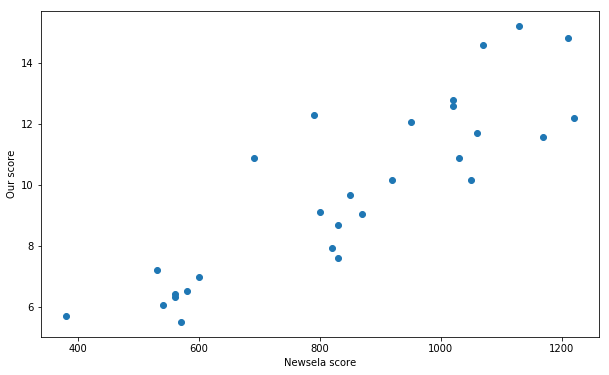

In [257]:
plt.figure(figsize=(10,6))
plt.xlabel("Newsela score")
plt.ylabel("Our score")
plt.scatter(x, y)